In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(""),"../python")))

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

import table_utils as tu


In [2]:
dfw = pd.read_pickle("../../intermediate/data_main.pkl")

In [3]:
# Summary statistics (counts)

idx1 = [True]*len(dfw)
idx2 = ~(dfw['AFFORDABLE']) & ~(dfw['MIXEDINCOME'])
idx3 = (dfw['MIXEDINCOME'])
idx4 = (dfw['AFFORDABLE'])

tbl = [['Summary Statistics']]
tbl.append(['', '', 'All Projects', 'Market-Rate Projects', 'Mixed-Income Projects', '100% Affordable Projects'])

row = ['\\multirow{3}{1.2in}{\\centering \\# Projects}', 'Total']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{len(dfw.loc[idx]):,.0f}")
tbl.append(row)
row = ['', 'Completed']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx,'COFO_DATE'].notnull().sum():,.0f}")
tbl.append(row)
row = ['', 'Not Completed']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx,'COFO_DATE'].isnull().sum():,.0f}")
tbl.append(row)

row = ['\\multirow{3}{1.2in}{\\centering \\# Dwelling Units}', 'Total']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx,'DU_CHANGED'].sum():,.0f}")
tbl.append(row)
row = ['', 'Completed']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx & (dfw['COFO_DATE'].notnull()), 'DU_CHANGED'].sum():,.0f}")
tbl.append(row)
row = ['', 'Not Completed']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx & (dfw['COFO_DATE'].isnull()), 'DU_CHANGED'].sum():,.0f}")
tbl.append(row)

row = ['\\multirow{3}{1.2in}{\\centering \\# Market-Rate Units}', 'Total']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx,'MARKETRATE_UNITS'].sum():,.0f}")
tbl.append(row)
row = ['', 'Completed']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx & (dfw['COFO_DATE'].notnull()), 'MARKETRATE_UNITS'].sum():,.0f}")
tbl.append(row)
row = ['', 'Not Completed']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx & (dfw['COFO_DATE'].isnull()), 'MARKETRATE_UNITS'].sum():,.0f}")
tbl.append(row)

row = ['\\multirow{3}{1.2in}{\\centering \\# Affordable Units}', 'Total']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx,'AFFORDABLE_UNITS'].sum():,.0f}")
tbl.append(row)
row = ['', 'Completed']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx & (dfw['COFO_DATE'].notnull()), 'AFFORDABLE_UNITS'].sum():,.0f}")
tbl.append(row)
row = ['', 'Not Completed']
for idx in [idx1, idx2, idx3, idx4]:
    row.append(f"{dfw.loc[idx & (dfw['COFO_DATE'].isnull()), 'AFFORDABLE_UNITS'].sum():,.0f}")
tbl.append(row)

tu.as_latex(tbl)


Summary Statistics\\ [1ex]
 &  & All Projects & Market-Rate Projects & Mixed-Income Projects & 100% Affordable Projects\\ [1ex]
\multirow{3}{1.2in}{\centering \# Projects} & Total & 2,677 & 1,681 & 701 & 295\\ [1ex]
 & Completed & 1,712 & 1,192 & 351 & 169\\ [1ex]
 & Not Completed & 965 & 489 & 350 & 126\\ [1ex]
\multirow{3}{1.2in}{\centering \# Dwelling Units} & Total & 120,213 & 70,272 & 36,269 & 13,672\\ [1ex]
 & Completed & 71,532 & 47,904 & 15,929 & 7,699\\ [1ex]
 & Not Completed & 48,681 & 22,368 & 20,340 & 5,973\\ [1ex]
\multirow{3}{1.2in}{\centering \# Market-Rate Units} & Total & 102,897 & 70,272 & 32,422 & 203\\ [1ex]
 & Completed & 62,493 & 47,904 & 14,449 & 140\\ [1ex]
 & Not Completed & 40,404 & 22,368 & 17,973 & 63\\ [1ex]
\multirow{3}{1.2in}{\centering \# Affordable Units} & Total & 17,316 & 0 & 3,847 & 13,469\\ [1ex]
 & Completed & 9,039 & 0 & 1,480 & 7,559\\ [1ex]
 & Not Completed & 8,277 & 0 & 2,367 & 5,910\\ [1ex]


C:\Users\ekung\AppData\Local\Temp\ipykernel_3204\4243599548.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


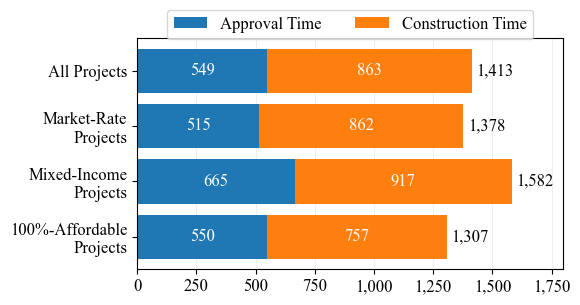

The average dwelling unit took 1,784 days to complete 4.9
The average dwelling unit took 755 days to approve 2.1
The average dwelling unit took 1,029 days to construct 2.8


In [4]:
# Development time chart

labs = ['All Projects', 'Market-Rate\nProjects', 'Mixed-Income\nProjects', '100%-Affordable\nProjects']
indexes = [
    dfw['COFO_DATE'].notnull(), 
    ~(dfw['AFFORDABLE']) & ~(dfw['MIXEDINCOME']) & (dfw['COFO_DATE'].notnull()), 
    (dfw['MIXEDINCOME']) & (dfw['COFO_DATE'].notnull()), 
    (dfw['AFFORDABLE']) & (dfw['COFO_DATE'].notnull())
]

approval = []
construction = []
total = []
for i in range(4):
    approval.append(dfw.loc[indexes[i], 'APPROVAL_TIME'].mean())
    construction.append( dfw.loc[indexes[i], 'CONSTRUCTION_TIME'].mean())
    total.append( dfw.loc[indexes[i], 'TOTAL_TIME'].mean())
approval = np.array(approval)
construction = np.array(construction)
total = np.array(total)
    
plt.figure(figsize=(5.5,3))
plt.rc('axes',labelsize=12)
plt.barh(labs[::-1], approval[::-1])
plt.barh(labs[::-1], construction[::-1], left=approval[::-1])
for i in range(4):
    plt.text(total[i] + 20, 3-i, f"{np.round(total[i]):,.0f}", va='center')
    plt.text(approval[i]/2, 3-i, f"{np.round(approval[i]):,.0f}", va='center', ha='center', color='white')
    plt.text(approval[i] + construction[i]/2, 3-i, f"{np.round(construction[i]):,.0f}", va='center', ha='center', color='white')
plt.xlim(0, 1800)
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])
plt.grid(axis='x',alpha=0.2)
plt.gca().set_axisbelow(True)
plt.legend(['Approval Time', 'Construction Time'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.16))
#plt.savefig('../../results/fig_times.svg', bbox_inches='tight')
plt.show()

du_time = np.average(dfw.loc[dfw['COFO_DATE'].notnull(), 'TOTAL_TIME'], weights=dfw.loc[dfw['COFO_DATE'].notnull(), 'DU_CHANGED'])
print(f"The average dwelling unit took {du_time:,.0f} days to complete {du_time/365.25:.1f}")

du_approve = np.average(dfw.loc[dfw['COFO_DATE'].notnull(), 'APPROVAL_TIME'], weights=dfw.loc[dfw['COFO_DATE'].notnull(), 'DU_CHANGED'])
print(f"The average dwelling unit took {du_approve:,.0f} days to approve {du_approve/365.25:.1f}")

du_construct = np.average(dfw.loc[dfw['COFO_DATE'].notnull(), 'CONSTRUCTION_TIME'], weights=dfw.loc[dfw['COFO_DATE'].notnull(), 'DU_CHANGED'])
print(f"The average dwelling unit took {du_construct:,.0f} days to construct {du_construct/365.25:.1f}")



C:\Users\ekung\AppData\Local\Temp\ipykernel_3204\4035866766.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


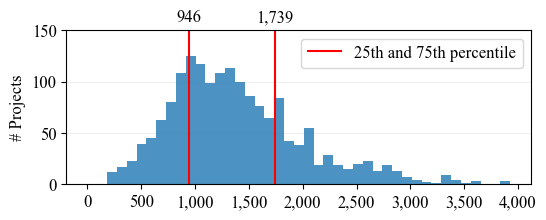

In [5]:
# Development time histograms

idx = dfw['COFO_DATE'].notnull()
approval_times = dfw.loc[idx, 'APPROVAL_TIME']
construction_times = dfw.loc[idx, 'CONSTRUCTION_TIME']

plt.figure(figsize=(6,2))
plt.rc('axes',labelsize=12)
bins = np.arange(0, 4000, step=365.25/4)
pct25 = dfw.loc[idx, 'TOTAL_TIME'].quantile(0.25)
pct75 = dfw.loc[idx, 'TOTAL_TIME'].quantile(0.75)
iqlocy = 135
plt.hist(dfw.loc[idx, 'TOTAL_TIME'], bins=bins, alpha=0.8)
plt.axvline(pct25, color='red')
plt.axvline(pct75, color='red')
plt.text(pct25, 155, f"{pct25:,.0f}", ha='center', va='bottom')
plt.text(pct75, 155, f"{pct75:,.0f}", ha='center', va='bottom')
plt.ylim(0, 150)
plt.ylabel('# Projects')
plt.legend(['25th and 75th percentile'], loc='upper right')
plt.grid(axis='y', alpha=0.2)
plt.gca().set_axisbelow(True)
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])
#plt.savefig('../../results/fig_hist.svg', bbox_inches='tight')
plt.show()
